# Fake_News_Classifier_Project:-  Flip Robo Technologies   |   

# Internship Batch No-31


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

## -Context
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

## -Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
What is a Fake News?
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.

## -Workflow

In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

#### -Natural Language Processing
Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.
In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.
#### -Dataset
You can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We are combined both datasets using pandas built-in function.

## Let's start Machine learning model building phase:

### Import Necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

#### Import data from csv file:

In [2]:
data_fake= pd.read_csv('C:/Users/user/fake_news/Fake.csv')

In [3]:
data_fake['News_type']='Fake'
data_fake.head()

,title,text,subject,date,News_type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [4]:
data_true= pd.read_csv('C:/Users/user/fake_news/True.csv')

In [5]:
data_true['News_type']='True'
data_true.head()

,title,text,subject,date,News_type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [6]:
data = pd.concat([data_fake, data_true])
data.head()

,title,text,subject,date,News_type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


#### Observations:

Concatenate fake and true dataset to form a new dataset and make a new column named 'News_type' where store the news type.

## 1. Data Cleaning:

In [7]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])

No. of Rows : 44898
No. of Columns : 5


In [8]:
data.columns.to_series().groupby(data.dtypes).groups

{object: ['title', 'text', 'subject', 'date', 'News_type']}

#### Observations:


1. This dataset contain 44898 rows and 5 columns.
2. Our target feature is News_type.
3. All of the features are categorical.

### Data Preprocessing:


In [9]:
data.isin([' --','null','NA',' ']).sum().any()

True

In [10]:
data.isnull().sum()

title        0
text         0
subject      0
date         0
News_type    0
dtype: int64

In [11]:
data.isin([' ']).sum()

title          0
text         627
subject        0
date           0
News_type      0
dtype: int64

#### Observations:

There are some space ' ' in the text column. Let's drop it. 

In [16]:
data['text'].replace(' ',np.nan,inplace=True)

In [17]:
data= data.dropna(subset=['text'])

In [18]:
data.isin([' --','null','NA',' ']).sum().any()

False

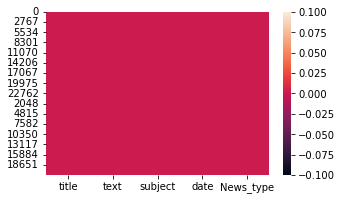

In [19]:
plt.figure(figsize=(5,3))
sns.heatmap(data.isnull())
plt.show()

#### Observations:

1. ' --', 'null', 'NA', '  ' are not present in the dataset.

### Encoding type dataset as true =1 and fake =0 and store it in a new column:

In [20]:
data['encoded_news_type'] = data['News_type'].astype('category').cat.codes

In [21]:
data = data.reset_index(drop=True)
data.tail(n=1)

,title,text,subject,date,News_type,encoded_news_type
44270,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44271 entries, 0 to 44270
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              44271 non-null  object
 1   text               44271 non-null  object
 2   subject            44271 non-null  object
 3   date               44271 non-null  object
 4   News_type          44271 non-null  object
 5   encoded_news_type  44271 non-null  int8  
dtypes: int8(1), object(5)
memory usage: 1.7+ MB


In [23]:
data.describe(exclude=np.number )

,title,text,subject,date,News_type
count,44271,44271,44271,44271,44271
unique,38284,38645,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",Fake
freq,14,8,11271,182,22855


#### Observations:

Let's encoded type dataset as true =1 and fake =0 and store it in a new column. Now there are a new column **encoded_news_type which is our target variable.**

In [25]:
data.nunique()

title                38284
text                 38645
subject                  8
date                  2397
News_type                2
encoded_news_type        2
dtype: int64

#### Observations:

There are total 8 subject type and two type of target variable. 

 Let's drop the unnecessary columns.

In [26]:
data = data.drop(['date', 'title'], axis=1)

### Data Analysis:

### Target Variable:

In [27]:
data.News_type.value_counts()

Fake    22855
True    21416
Name: News_type, dtype: int64

In [28]:
data.News_type.value_counts()*100/len(data)

Fake    51.625217
True    48.374783
Name: News_type, dtype: float64

<AxesSubplot:xlabel='News_type', ylabel='count'>

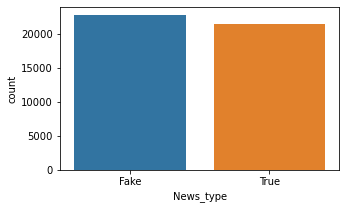

In [29]:
plt.figure(figsize=(5,3))
sns.countplot(data['News_type'])

#### Observations:

There are two type of News_type, True and False. The percentage of two different type is around 50%. We can say that, **the dataset is totally balanced.**

In [31]:
data.subject.value_counts()*100/len(data)

politicsNews       25.459104
worldnews          22.915678
News               20.442276
politics           14.535475
left-news           9.735493
Government News     3.385964
US_News             1.768652
Middle-east         1.757358
Name: subject, dtype: float64

<AxesSubplot:xlabel='subject', ylabel='count'>

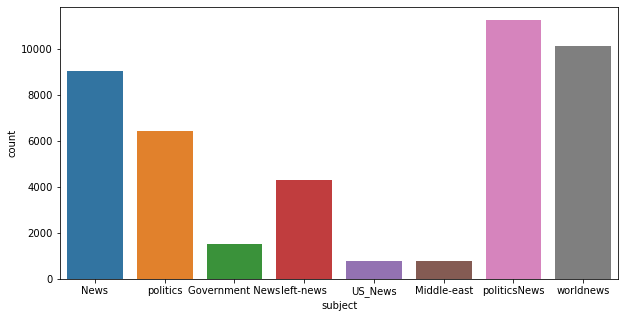

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data['subject'])

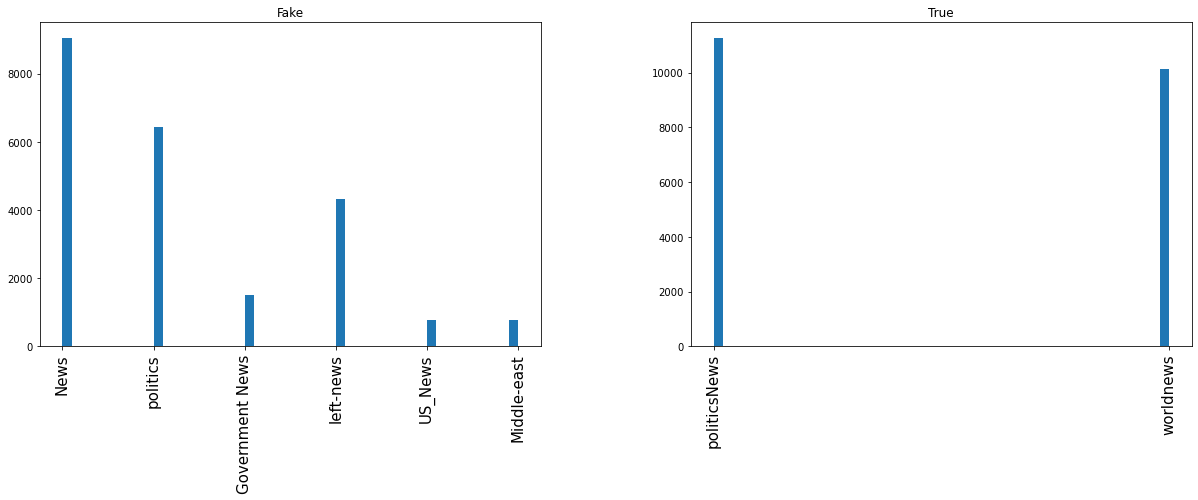

In [33]:
data.hist(column='subject', by='News_type', bins=50,figsize=(20,6),xlabelsize=15 )
plt.show()

#### Observations:

There are total 8 types of subject. Of them , politicsNews type is maximum(25%) and Middle-east is minimum (just 1%). 

Let's **calculate the length of the news text** before processding further.

In [34]:
data['length_before_cleaning'] = data['text'].str.len()
data.tail()

,text,subject,News_type,encoded_news_type,length_before_cleaning
44266,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,True,1,2821
44267,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,True,1,800
44268,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,True,1,1950
44269,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,True,1,1199
44270,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,True,1,1338


### Natural Language Processing Before making ML Model:

In [35]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemma = WordNetLemmatizer()

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [36]:
#Function for cleaning the text 
def text_cleaning(text):
    #Defining empty string
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special characters
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in stop:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [37]:
data['text']=data['text'].apply(text_cleaning)

In [38]:
data['length_cleaning1'] = data['text'].str.len()
data.head()

,text,subject,News_type,encoded_news_type,length_before_cleaning,length_cleaning1
0,donald trump wish american happy new year leav...,News,Fake,0,2893,1965
1,house intelligence committee chairman devin nu...,News,Fake,0,1898,1365
2,friday revealed former milwaukee sheriff david...,News,Fake,0,3597,2508
3,christmas day donald trump announced would bac...,News,Fake,0,2774,1964
4,pope francis used annual christmas day message...,News,Fake,0,2346,1424


#### Observations:


Apply all necessary steps on massage body column for cleaning the dataset. The steps are as follows.

1. First lowercased strings from the given string by converting each uppercase character to lowercase for the full news text.
2. Now simplifying text by converting different short form of words (contractions) to the actual words.
3. Then removing any special characters.
4. By using WordNetLemmatizer, lemmatize the news text.

### Exploring the text by WordCloud:

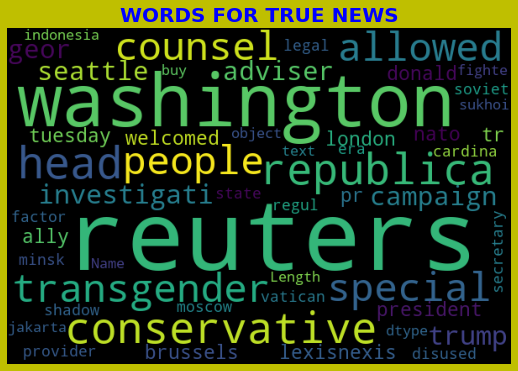

In [36]:
from wordcloud import WordCloud
spam = data['text'][data['encoded_news_type']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(spam))
plt.figure(figsize=(7,5),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS FOR TRUE NEWS',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

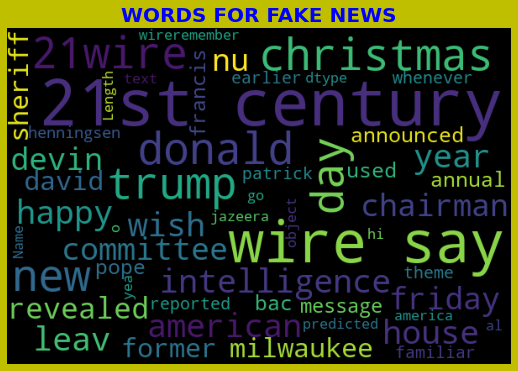

In [37]:
from wordcloud import WordCloud
spam = data['text'][data['encoded_news_type']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(spam))
plt.figure(figsize=(7,5),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS FOR FAKE NEWS',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

#### Observations:

No special observation is done. Now finalize the dataset for model building by taking only two necessary columns.

In [50]:
final_data= data[['text', 'encoded_news_type']]
final_data.sample(n=5)

,text,encoded_news_type
4983,sen lindsey graham r sc worried mayhem donald ...,0
10953,judge jeanine pirro slam hillary clinton clint...,0
34014,san juan reuters u treasury secretary jack lew...,1
7781,super pac representing white nationalist roboc...,0
30665,winston salem n c reuters state judge north ca...,1


## Machine learning model building (Classification Model):

**Here target variable is wheather the news text is fake or not. So it is a binary data and the problem is classification problem.**

In [58]:
x= final_data['text']
y= final_data['encoded_news_type']

#### Observations:

First seperate the whole data into two part, feature and lebel. Now split them again into two part both for training and testing purpose.

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 42)

### 1. Using LinearSVC: 

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [75]:
#Tfidf vectorizer
linsvc = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

#Fitting the model
linsvc.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [76]:
y_pred =  linsvc.predict(x_test)

In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6854
           1       0.99      1.00      0.99      6428

    accuracy                           1.00     13282
   macro avg       1.00      1.00      1.00     13282
weighted avg       1.00      1.00      1.00     13282



In [78]:
print(metrics.accuracy_score(y_test,y_pred))

0.9950308688450534


#### Observations:

It gives a good accuracy score. Let's try some other algorithm also.

### 2. Using LogisticRegression:

In [65]:
from sklearn.linear_model import LogisticRegression
#Tfidf vectorizer
logreg = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])

#Fitting the model
logreg.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [66]:
y_pred =  logreg.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6854
           1       0.98      0.99      0.99      6428

    accuracy                           0.99     13282
   macro avg       0.99      0.99      0.99     13282
weighted avg       0.99      0.99      0.99     13282



In [67]:
print(metrics.accuracy_score(y_test,y_pred))

0.9859960849269689


### 3. Using MultinomialNB:

In [68]:
from sklearn.naive_bayes import MultinomialNB
#Tfidf vectorizer
mulnb = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

#Fitting the model
mulnb.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [69]:
y_pred =  mulnb.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6854
           1       0.94      0.93      0.93      6428

    accuracy                           0.94     13282
   macro avg       0.94      0.94      0.94     13282
weighted avg       0.94      0.94      0.94     13282



In [70]:
print(metrics.accuracy_score(y_test,y_pred))

0.9360789037795513


### 4. Using DecisionTreeClassifier:

In [71]:
from sklearn.tree import DecisionTreeClassifier
#Tfidf vectorizer
dt = Pipeline([('tfidf',TfidfVectorizer()),('clf',DecisionTreeClassifier())])

#Fitting the model
dt.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [72]:
y_pred =  dt.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6854
           1       0.99      1.00      1.00      6428

    accuracy                           1.00     13282
   macro avg       1.00      1.00      1.00     13282
weighted avg       1.00      1.00      1.00     13282



In [73]:
print(metrics.accuracy_score(y_test,y_pred))

0.9957837675048938


#### Observations:

Both DecisionTreeClassifier and LinearSVC is good for this particular dataset.

### AUC-ROC Curve:

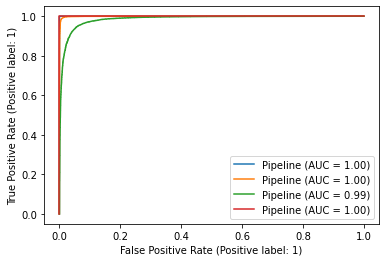

In [79]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(linsvc, x_train, y_train)
plot_roc_curve(logreg, x_train, y_train, ax=disp.ax_)
plot_roc_curve(mulnb, x_train, y_train, ax=disp.ax_)
plot_roc_curve(dt, x_train, y_train, ax=disp.ax_)
plt.show()

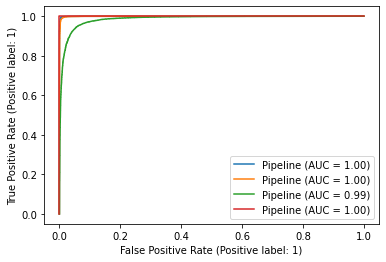

In [80]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(linsvc, x_test, y_test)
plot_roc_curve(logreg, x_train, y_train, ax=disp.ax_)
plot_roc_curve(mulnb, x_train, y_train, ax=disp.ax_)
plot_roc_curve(dt, x_train, y_train, ax=disp.ax_)
plt.show()

## Final model:

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
linsvc.fit(x_train, y_train)

y_pred = linsvc.predict(x_test)
print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print('training score : ', linsvc.score(x_train, y_train))
print('testing score : ', linsvc.score(x_test, y_test))

accu score :  0.9950308688450534
cof_mat:

  [[6818   36]
 [  30 6398]]
classification report:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00      6854
           1       0.99      1.00      0.99      6428

    accuracy                           1.00     13282
   macro avg       1.00      1.00      1.00     13282
weighted avg       1.00      1.00      1.00     13282

training score :  0.999645035335119
testing score :  0.9950308688450534


#### Observations:

Here  LinearSVC  is the final model for this dataset. Here the training score is 100% and testing score is around 99.5% with 99.5% accuracy.

### Confusion Matrix:

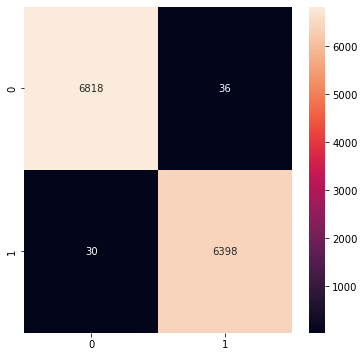

In [83]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

### Save the model for future use:

In [84]:
import pickle
pickle.dump(linsvc, open("Fake_News_Classification_model", "wb"))
load_Fake_News_Classification_model= pickle.load(open("Fake_News_Classification_model", "rb"))

In [85]:
y_pred = load_Fake_News_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
1674,1,1
8716,0,0
11680,0,0
1596,0,0
8571,1,1
770,1,1
